In [ ]:
import sys
import os

sys.path.append(os.path.join('..', '..', '..'))

In [4]:
from roboflow import Roboflow
from utils import get_settings

settings = get_settings()
ROBOFLOW_API_KEY = settings.ROBOFLOW_API_KEY
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("mihailo").project("football-field-detection-f07vi-apxzb")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.81, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-field-detection-1 in yolov8:: 100%|██████████| 1666/1666 [00:01<00:00, 1118.60it/s]


In [5]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'flip_idx': [24, 25, 26, 27, 28, 29, 22, 23, 21, 17, 18, 19, 20, 13, 14, 15, 16, 9, 10, 11, 12, 8, 6, 7, 0, 1, 2, 3, 4, 5, 31, 30], 'kpt_shape': [32, 3], 'names': ['pitch'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-field-detection-f07vi-apxzb', 'url': 'https://universe.roboflow.com/mihailo/football-field-detection-f07vi-apxzb/dataset/1', 'version': 1, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
!yolo task=pose mode=train model=yolo11n-pose.pt data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False


In [ ]:
!yolo mode=train resume model=runs/pose/train6/weights/last.pt task=pose data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False


In [6]:
RESULTS_DIR = 'runs/pose/train_yolov11/'


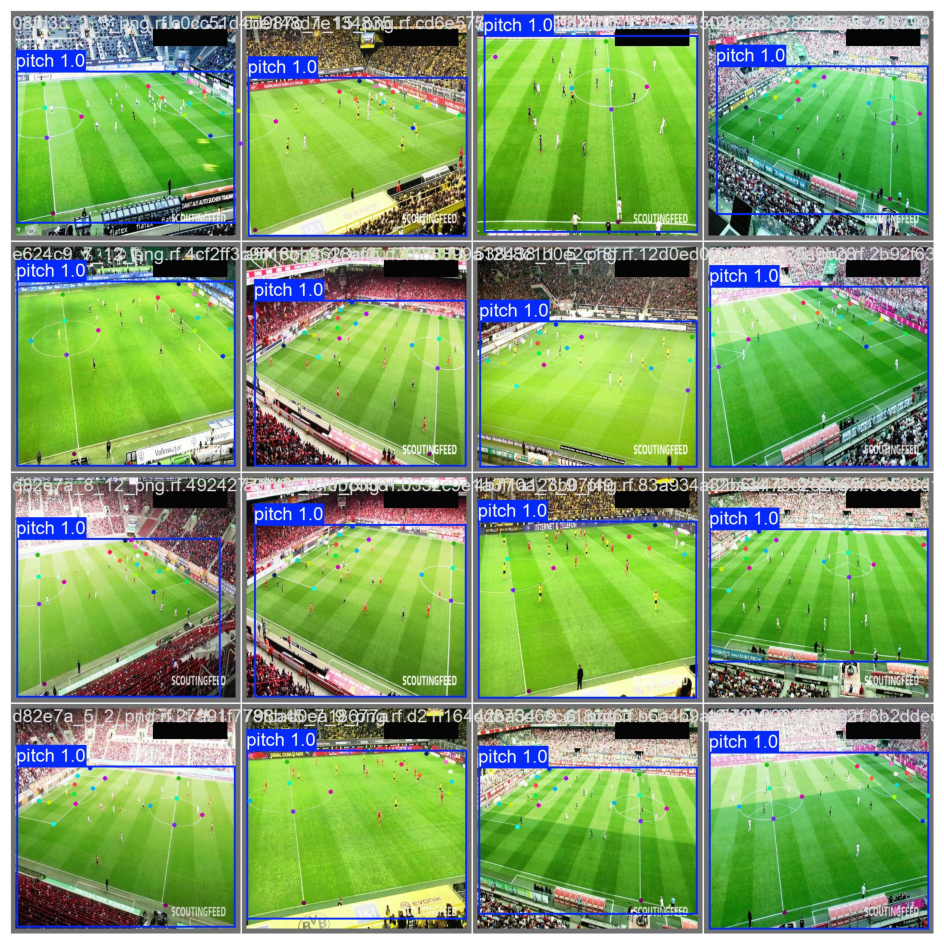

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()

In [8]:
!yolo task=pose mode=val model={RESULTS_DIR}/weights/best.pt data={YAML_PATH}


Ultralytics 8.3.9 🚀 Python-3.11.4 torch-2.4.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLO11n-pose summary (fused): 257 layers, 3,246,763 parameters, 0 gradients, 9.1 GFLOPs
val: New cache created: D:\Academic\Code\Projects\football\football-field-detection-1\valid\labels.cache
                   all         34         34          1          1      0.995      0.995          1          1      0.995      0.994
Speed: 3.0ms preprocess, 96.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\pose\val3
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Academic\Code\Projects\football\football-field-detection-1\valid\labels...:   0%|          | 0/34 [00:00<?, ?it/s]
val: Scanning D:\Academic\Code\Projects\football\football-field-detection-1\valid\labels... 1 images, 0 backgrounds, 0 corrupt:   3%|▎         | 1/34 [00:00<00:06,  5.12it/s]
val: Scanning D:\Academic\Code\Projects\football\football-field-detection-1\valid\labels... 17 images, 0 backgrounds, 0 corrupt:  50%|█████     | 17/34 [00:00<00:00, 61.43it/s]
val: Scanning D:\Academic\Code\Projects\football\football-field-detection-1\valid\labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 81.65it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:01<00:

In [9]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../weights'
destination_file = os.path.join(destination_dir, 'keypoints-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")

File moved and renamed to ../../weights\keypoints-detection.pt
